In [52]:
import matplotlib.pyplot as plt
from itertools import zip_longest


In [53]:

def parse_massif(filepath):
    times = []
    mems = []
    with open(filepath, 'r') as f:
        for line in f:
            line = line.strip()
            if line.startswith('time='):
                times.append(int(line.split('=')[1]))
            elif line.startswith('mem_heap_B='):
                mems.append(int(line.split('=')[1]))
    return times, mems


In [54]:
def_string = "def_gar3-"
gen_string = "gen_gar3-"
# Load data
t1_def, m1_def = parse_massif(def_string + "1.out")
t2_def, m2_def = parse_massif(def_string + "2.out")
t3_def, m3_def = parse_massif(def_string + "3.out")

t1_gen, m1_gen = parse_massif(gen_string + "1.out")
t2_gen, m2_gen = parse_massif(gen_string + "2.out")
t3_gen, m3_gen = parse_massif(gen_string + "3.out")


In [55]:

# Convert to MB
m_def_mb = [(x / (1024**2) + y/(1024**2) + z/(1024**2))/3 for x, y, z in zip(m1_def, m2_def, m3_def)]
m_gen_mb = [(x / (1024**2) + y/(1024**2) + z/(1024**2))/3 for x, y, z in zip(m1_gen, m2_gen, m3_gen)]


In [56]:
t_def =[(x+y+z)/3 for x, y, z in zip(t1_def, t2_def, t3_def)] 
t_gen =[(x+y+z)/3 for x, y, z in zip(t1_gen, t2_gen, t3_gen)] 
# t_gen = (t1_gen + t2_gen + t3_gen) / 3

Text(0.5, 1.0, 'Memory Usage Comparison in Script 3')

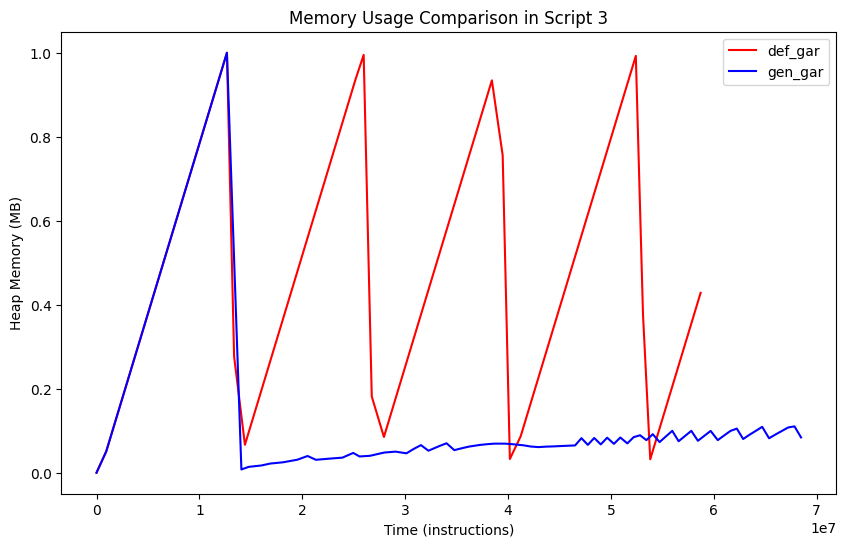

In [57]:

# Plot
plt.figure(figsize=(10, 6))
plt.plot(t_def, m_def_mb, label='def_gar', color='red')
plt.plot(t_gen, m_gen_mb, label='gen_gar', color='blue')
plt.xlabel('Time (instructions)')
plt.ylabel('Heap Memory (MB)')
plt.legend()
plt.title('Memory Usage Comparison in Script ' + def_string[len(def_string)-2])
# plt.savefig('Script '+ def_string[len(def_string)-2] + " plot.jpeg")
# plt.show()